In [1]:
%matplotlib inline


# Plotting Validation Curves

In this example the impact of the :class:`~imblearn.over_sampling.SMOTE`'s
`k_neighbors` parameter is examined. In the plot you can see the validation
scores of a SMOTE-CART classifier for different values of the
:class:`~imblearn.over_sampling.SMOTE`'s `k_neighbors` parameter.


In [2]:
# Authors: Christos Aridas
#          Guillaume Lemaitre <g.lemaitre58@gmail.com>
# License: MIT

In [3]:
print(__doc__)

import seaborn as sns

sns.set_context("poster")


RANDOM_STATE = 42

Automatically created module for IPython interactive environment


Let's first generate a dataset with imbalanced class distribution.



In [4]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_classes=2,
    class_sep=2,
    weights=[0.9, 0.1],
    n_informative=10,
    n_redundant=1,
    flip_y=0,
    n_features=20,
    n_clusters_per_class=4,
    n_samples=5000,
    random_state=RANDOM_STATE,
)

We will use an over-sampler :class:`~imblearn.over_sampling.SMOTE` followed
by a :class:`~sklearn.tree.DecisionTreeClassifier`. The aim will be to
search which `k_neighbors` parameter is the most adequate with the dataset
that we generated.



In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from VAEOversampler import VAEOversampler

model = make_pipeline(
    VAEOversampler(random_state=RANDOM_STATE), DecisionTreeClassifier(random_state=RANDOM_STATE)
)

2023-07-07 18:05:07.367993: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-07-07 18:05:07.368018: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


We can use the :class:`~sklearn.model_selection.validation_curve` to inspect
the impact of varying the parameter `k_neighbors`. In this case, we need
to use a score to evaluate the generalization score during the
cross-validation.



In [7]:
from sklearn.metrics import cohen_kappa_score, make_scorer
from sklearn.model_selection import validation_curve

scorer = make_scorer(cohen_kappa_score)
param_range = range(1, 11)
train_scores, test_scores = validation_curve(
    model,
    X,
    y,
    param_name="verbose",
    param_range=param_range,
    cv=3,
    scoring=scorer,
)

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_input (InputLayer)     [(None, 20)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 12)           252         ['encoder_input[0][0]']          
                                                                                                  
 z_mean (Dense)                 (None, 1)            13          ['dense[0][0]']                  
                                                                                                  
 z_log_var (Dense)              (None, 1)            13          ['dense[0][0]']                  
                                                                                            

2023-07-07 18:05:12.319335: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-07-07 18:05:12.319367: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-07-07 18:05:12.319390: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (a-Modern-15-A5M): /proc/driver/nvidia/version does not exist
2023-07-07 18:05:12.319690: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "vae_mlp"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_input (InputLayer)     [(None, 20)]         0           []                               
                                                                                                  
 encoder (Functional)           [(None, 1),          278         ['encoder_input[0][0]']          
                                 (None, 1),                                                       
                                 (None, 1)]                                                       
                                                                                                  
 decoder (Functional)           (None, 20)           284         ['encoder[0][2]']                
                                                                                            

Total params: 278
Trainable params: 278
Non-trainable params: 0
__________________________________________________________________________________________________
Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 z_sampling (InputLayer)     [(None, 1)]               0         
                                                                 
 dense_4 (Dense)             (None, 12)                24        
                                                                 
 dense_5 (Dense)             (None, 20)                260       
                                                                 
Total params: 284
Trainable params: 284
Non-trainable params: 0
_________________________________________________________________
Model: "vae_mlp"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape  

 encoder_input (InputLayer)     [(None, 20)]         0           []                               
                                                                                                  
 dense_6 (Dense)                (None, 12)           252         ['encoder_input[0][0]']          
                                                                                                  
 z_mean (Dense)                 (None, 1)            13          ['dense_6[0][0]']                
                                                                                                  
 z_log_var (Dense)              (None, 1)            13          ['dense_6[0][0]']                
                                                                                                  
 z (Lambda)                     (None, 1)            0           ['z_mean[0][0]',                 
                                                                  'z_log_var[0][0]']              
          

Epoch 1/10
6/6 [==============================] - 0s 3ms/step - loss: 121.6190
Epoch 2/10
6/6 [==============================] - 0s 3ms/step - loss: 119.7460
Epoch 3/10
6/6 [==============================] - 0s 3ms/step - loss: 117.5182
Epoch 4/10
6/6 [==============================] - 0s 3ms/step - loss: 118.9616
Epoch 5/10
6/6 [==============================] - 0s 3ms/step - loss: 114.7863
Epoch 6/10
6/6 [==============================] - 0s 3ms/step - loss: 116.5500
Epoch 7/10
6/6 [==============================] - 0s 3ms/step - loss: 119.2045
Epoch 8/10
6/6 [==============================] - 0s 3ms/step - loss: 115.6940
Epoch 9/10
6/6 [==============================] - 0s 3ms/step - loss: 114.0375
Epoch 10/10
6/6 [==============================] - 0s 3ms/step - loss: 114.8250
[Pipeline] .... (step 1 of 2) Processing vaeoversampler, total=   1.0s
[Pipeline]  (step 2 of 2) Processing decisiontreeclassifier, total=   0.1s
Model: "encoder"
______________________________________________

                                                                                                  
 tf.__operators__.add_7 (TFOpLa  (None,)             0           ['tf.math.multiply_6[0][0]',     
 mbda)                                                            'tf.math.multiply_7[0][0]']     
                                                                                                  
 tf.math.reduce_mean_7 (TFOpLam  ()                  0           ['tf.__operators__.add_7[0][0]'] 
 bda)                                                                                             
                                                                                                  
 add_loss_3 (AddLoss)           ()                   0           ['tf.math.reduce_mean_7[0][0]']  
                                                                                                  
Total params: 562
Trainable params: 562
Non-trainable params: 0
_____________________________________________

                                                                                                  
 tf.math.reduce_mean_8 (TFOpLam  (None,)             0           ['tf.math.squared_difference_4[0]
 bda)                                                            [0]']                            
                                                                                                  
 tf.math.reduce_sum_4 (TFOpLamb  (None,)             0           ['tf.math.subtract_9[0][0]']     
 da)                                                                                              
                                                                                                  
 tf.math.multiply_8 (TFOpLambda  (None,)             0           ['tf.math.reduce_mean_8[0][0]']  
 )                                                                                                
                                                                                                  
 tf.math.m

 tf.cast_5 (TFOpLambda)         (None, 20)           0           ['encoder_input[0][0]']          
                                                                                                  
 tf.math.subtract_10 (TFOpLambd  (None, 1)           0           ['tf.__operators__.add_10[0][0]',
 a)                                                               'tf.math.square_5[0][0]']       
                                                                                                  
 tf.math.exp_5 (TFOpLambda)     (None, 1)            0           ['z_log_var[0][0]']              
                                                                                                  
 tf.math.squared_difference_5 (  (None, 20)          0           ['tf.convert_to_tensor_5[0][0]', 
 TFOpLambda)                                                      'tf.cast_5[0][0]']              
                                                                                                  
 tf.math.s

 z_log_var (Dense)              (None, 1)            13          ['dense_18[0][0]']               
                                                                                                  
 z_mean (Dense)                 (None, 1)            13          ['dense_18[0][0]']               
                                                                                                  
 tf.__operators__.add_12 (TFOpL  (None, 1)           0           ['z_log_var[0][0]']              
 ambda)                                                                                           
                                                                                                  
 tf.math.square_6 (TFOpLambda)  (None, 1)            0           ['z_mean[0][0]']                 
                                                                                                  
 tf.convert_to_tensor_6 (TFOpLa  (None, 20)          0           ['decoder[0][0]']                
 mbda)    

 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_input (InputLayer)     [(None, 20)]         0           []                               
                                                                                                  
 encoder (Functional)           [(None, 1),          278         ['encoder_input[0][0]']          
                                 (None, 1),                                                       
                                 (None, 1)]                                                       
                                                                                                  
 decoder (Functional)           (None, 20)           284         ['encoder[0][2]']                
                                                                                                  
 dense_21 (Dense)               (None, 12)           252         ['encoder_input[0][0]']          
          

Total params: 278
Trainable params: 278
Non-trainable params: 0
__________________________________________________________________________________________________
Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 z_sampling (InputLayer)     [(None, 1)]               0         
                                                                 
 dense_25 (Dense)            (None, 12)                24        
                                                                 
 dense_26 (Dense)            (None, 20)                260       
                                                                 
Total params: 284
Trainable params: 284
Non-trainable params: 0
_________________________________________________________________
Model: "vae_mlp"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape  

 encoder_input (InputLayer)     [(None, 20)]         0           []                               
                                                                                                  
 dense_27 (Dense)               (None, 12)           252         ['encoder_input[0][0]']          
                                                                                                  
 z_mean (Dense)                 (None, 1)            13          ['dense_27[0][0]']               
                                                                                                  
 z_log_var (Dense)              (None, 1)            13          ['dense_27[0][0]']               
                                                                                                  
 z (Lambda)                     (None, 1)            0           ['z_mean[0][0]',                 
                                                                  'z_log_var[0][0]']              
          

Epoch 1/10
6/6 [==============================] - 0s 3ms/step - loss: 113.9345
Epoch 2/10
6/6 [==============================] - 0s 3ms/step - loss: 113.5307
Epoch 3/10
6/6 [==============================] - 0s 3ms/step - loss: 113.3114
Epoch 4/10
6/6 [==============================] - 0s 3ms/step - loss: 114.2348
Epoch 5/10
6/6 [==============================] - 0s 3ms/step - loss: 113.8594
Epoch 6/10
6/6 [==============================] - 0s 2ms/step - loss: 113.3268
Epoch 7/10
6/6 [==============================] - 0s 3ms/step - loss: 113.3252
Epoch 8/10
6/6 [==============================] - 0s 3ms/step - loss: 111.7920
Epoch 9/10
6/6 [==============================] - 0s 3ms/step - loss: 108.0803
Epoch 10/10
6/6 [==============================] - 0s 3ms/step - loss: 110.7543
[Pipeline] .... (step 1 of 2) Processing vaeoversampler, total=   0.9s
[Pipeline]  (step 2 of 2) Processing decisiontreeclassifier, total=   0.1s
Model: "encoder"
______________________________________________

                                                                                                  
 tf.__operators__.add_21 (TFOpL  (None,)             0           ['tf.math.multiply_20[0][0]',    
 ambda)                                                           'tf.math.multiply_21[0][0]']    
                                                                                                  
 tf.math.reduce_mean_21 (TFOpLa  ()                  0           ['tf.__operators__.add_21[0][0]']
 mbda)                                                                                            
                                                                                                  
 add_loss_10 (AddLoss)          ()                   0           ['tf.math.reduce_mean_21[0][0]'] 
                                                                                                  
Total params: 562
Trainable params: 562
Non-trainable params: 0
_____________________________________________

                                                                                                  
 tf.math.reduce_mean_22 (TFOpLa  (None,)             0           ['tf.math.squared_difference_11[0
 mbda)                                                           ][0]']                           
                                                                                                  
 tf.math.reduce_sum_11 (TFOpLam  (None,)             0           ['tf.math.subtract_23[0][0]']    
 bda)                                                                                             
                                                                                                  
 tf.math.multiply_22 (TFOpLambd  (None,)             0           ['tf.math.reduce_mean_22[0][0]'] 
 a)                                                                                               
                                                                                                  
 tf.math.m

 tf.cast_12 (TFOpLambda)        (None, 20)           0           ['encoder_input[0][0]']          
                                                                                                  
 tf.math.subtract_24 (TFOpLambd  (None, 1)           0           ['tf.__operators__.add_24[0][0]',
 a)                                                               'tf.math.square_12[0][0]']      
                                                                                                  
 tf.math.exp_12 (TFOpLambda)    (None, 1)            0           ['z_log_var[0][0]']              
                                                                                                  
 tf.math.squared_difference_12   (None, 20)          0           ['tf.convert_to_tensor_12[0][0]',
 (TFOpLambda)                                                     'tf.cast_12[0][0]']             
                                                                                                  
 tf.math.s

 z_log_var (Dense)              (None, 1)            13          ['dense_39[0][0]']               
                                                                                                  
 z_mean (Dense)                 (None, 1)            13          ['dense_39[0][0]']               
                                                                                                  
 tf.__operators__.add_26 (TFOpL  (None, 1)           0           ['z_log_var[0][0]']              
 ambda)                                                                                           
                                                                                                  
 tf.math.square_13 (TFOpLambda)  (None, 1)           0           ['z_mean[0][0]']                 
                                                                                                  
 tf.convert_to_tensor_13 (TFOpL  (None, 20)          0           ['decoder[0][0]']                
 ambda)   

 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_input (InputLayer)     [(None, 20)]         0           []                               
                                                                                                  
 encoder (Functional)           [(None, 1),          278         ['encoder_input[0][0]']          
                                 (None, 1),                                                       
                                 (None, 1)]                                                       
                                                                                                  
 decoder (Functional)           (None, 20)           284         ['encoder[0][2]']                
                                                                                                  
 dense_42 (Dense)               (None, 12)           252         ['encoder_input[0][0]']          
          

Total params: 278
Trainable params: 278
Non-trainable params: 0
__________________________________________________________________________________________________
Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 z_sampling (InputLayer)     [(None, 1)]               0         
                                                                 
 dense_46 (Dense)            (None, 12)                24        
                                                                 
 dense_47 (Dense)            (None, 20)                260       
                                                                 
Total params: 284
Trainable params: 284
Non-trainable params: 0
_________________________________________________________________
Model: "vae_mlp"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape  

 encoder_input (InputLayer)     [(None, 20)]         0           []                               
                                                                                                  
 dense_48 (Dense)               (None, 12)           252         ['encoder_input[0][0]']          
                                                                                                  
 z_mean (Dense)                 (None, 1)            13          ['dense_48[0][0]']               
                                                                                                  
 z_log_var (Dense)              (None, 1)            13          ['dense_48[0][0]']               
                                                                                                  
 z (Lambda)                     (None, 1)            0           ['z_mean[0][0]',                 
                                                                  'z_log_var[0][0]']              
          

Epoch 1/10
6/6 [==============================] - 0s 2ms/step - loss: 117.7147
Epoch 2/10
6/6 [==============================] - 0s 3ms/step - loss: 115.2746
Epoch 3/10
6/6 [==============================] - 0s 3ms/step - loss: 111.6663
Epoch 4/10
6/6 [==============================] - 0s 3ms/step - loss: 115.2642
Epoch 5/10
6/6 [==============================] - 0s 3ms/step - loss: 111.7535
Epoch 6/10
6/6 [==============================] - 0s 3ms/step - loss: 112.4901
Epoch 7/10
6/6 [==============================] - 0s 3ms/step - loss: 111.1858
Epoch 8/10
6/6 [==============================] - 0s 3ms/step - loss: 110.2811
Epoch 9/10
6/6 [==============================] - 0s 3ms/step - loss: 111.3131
Epoch 10/10
6/6 [==============================] - 0s 3ms/step - loss: 109.0587
[Pipeline] .... (step 1 of 2) Processing vaeoversampler, total=   0.9s
[Pipeline]  (step 2 of 2) Processing decisiontreeclassifier, total=   0.1s
Model: "encoder"
______________________________________________

                                                                                                  
 tf.__operators__.add_35 (TFOpL  (None,)             0           ['tf.math.multiply_34[0][0]',    
 ambda)                                                           'tf.math.multiply_35[0][0]']    
                                                                                                  
 tf.math.reduce_mean_35 (TFOpLa  ()                  0           ['tf.__operators__.add_35[0][0]']
 mbda)                                                                                            
                                                                                                  
 add_loss_17 (AddLoss)          ()                   0           ['tf.math.reduce_mean_35[0][0]'] 
                                                                                                  
Total params: 562
Trainable params: 562
Non-trainable params: 0
_____________________________________________

                                                                                                  
 tf.math.reduce_mean_36 (TFOpLa  (None,)             0           ['tf.math.squared_difference_18[0
 mbda)                                                           ][0]']                           
                                                                                                  
 tf.math.reduce_sum_18 (TFOpLam  (None,)             0           ['tf.math.subtract_37[0][0]']    
 bda)                                                                                             
                                                                                                  
 tf.math.multiply_36 (TFOpLambd  (None,)             0           ['tf.math.reduce_mean_36[0][0]'] 
 a)                                                                                               
                                                                                                  
 tf.math.m

 tf.cast_19 (TFOpLambda)        (None, 20)           0           ['encoder_input[0][0]']          
                                                                                                  
 tf.math.subtract_38 (TFOpLambd  (None, 1)           0           ['tf.__operators__.add_38[0][0]',
 a)                                                               'tf.math.square_19[0][0]']      
                                                                                                  
 tf.math.exp_19 (TFOpLambda)    (None, 1)            0           ['z_log_var[0][0]']              
                                                                                                  
 tf.math.squared_difference_19   (None, 20)          0           ['tf.convert_to_tensor_19[0][0]',
 (TFOpLambda)                                                     'tf.cast_19[0][0]']             
                                                                                                  
 tf.math.s

 z_log_var (Dense)              (None, 1)            13          ['dense_60[0][0]']               
                                                                                                  
 z_mean (Dense)                 (None, 1)            13          ['dense_60[0][0]']               
                                                                                                  
 tf.__operators__.add_40 (TFOpL  (None, 1)           0           ['z_log_var[0][0]']              
 ambda)                                                                                           
                                                                                                  
 tf.math.square_20 (TFOpLambda)  (None, 1)           0           ['z_mean[0][0]']                 
                                                                                                  
 tf.convert_to_tensor_20 (TFOpL  (None, 20)          0           ['decoder[0][0]']                
 ambda)   

 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_input (InputLayer)     [(None, 20)]         0           []                               
                                                                                                  
 encoder (Functional)           [(None, 1),          278         ['encoder_input[0][0]']          
                                 (None, 1),                                                       
                                 (None, 1)]                                                       
                                                                                                  
 decoder (Functional)           (None, 20)           284         ['encoder[0][2]']                
                                                                                                  
 dense_63 (Dense)               (None, 12)           252         ['encoder_input[0][0]']          
          

Total params: 278
Trainable params: 278
Non-trainable params: 0
__________________________________________________________________________________________________
Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 z_sampling (InputLayer)     [(None, 1)]               0         
                                                                 
 dense_67 (Dense)            (None, 12)                24        
                                                                 
 dense_68 (Dense)            (None, 20)                260       
                                                                 
Total params: 284
Trainable params: 284
Non-trainable params: 0
_________________________________________________________________
Model: "vae_mlp"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape  

 encoder_input (InputLayer)     [(None, 20)]         0           []                               
                                                                                                  
 dense_69 (Dense)               (None, 12)           252         ['encoder_input[0][0]']          
                                                                                                  
 z_mean (Dense)                 (None, 1)            13          ['dense_69[0][0]']               
                                                                                                  
 z_log_var (Dense)              (None, 1)            13          ['dense_69[0][0]']               
                                                                                                  
 z (Lambda)                     (None, 1)            0           ['z_mean[0][0]',                 
                                                                  'z_log_var[0][0]']              
          

Epoch 1/10
6/6 [==============================] - 0s 2ms/step - loss: 127.0878
Epoch 2/10
6/6 [==============================] - 0s 3ms/step - loss: 122.1791
Epoch 3/10
6/6 [==============================] - 0s 3ms/step - loss: 119.6480
Epoch 4/10
6/6 [==============================] - 0s 3ms/step - loss: 121.0183
Epoch 5/10
6/6 [==============================] - 0s 3ms/step - loss: 115.3071
Epoch 6/10
6/6 [==============================] - 0s 3ms/step - loss: 113.0526
Epoch 7/10
6/6 [==============================] - 0s 3ms/step - loss: 113.8858
Epoch 8/10
6/6 [==============================] - 0s 3ms/step - loss: 113.0055
Epoch 9/10
6/6 [==============================] - 0s 3ms/step - loss: 111.6620
Epoch 10/10
6/6 [==============================] - 0s 3ms/step - loss: 111.9566
[Pipeline] .... (step 1 of 2) Processing vaeoversampler, total=   0.9s
[Pipeline]  (step 2 of 2) Processing decisiontreeclassifier, total=   0.1s
Model: "encoder"
______________________________________________

                                                                                                  
 tf.__operators__.add_49 (TFOpL  (None,)             0           ['tf.math.multiply_48[0][0]',    
 ambda)                                                           'tf.math.multiply_49[0][0]']    
                                                                                                  
 tf.math.reduce_mean_49 (TFOpLa  ()                  0           ['tf.__operators__.add_49[0][0]']
 mbda)                                                                                            
                                                                                                  
 add_loss_24 (AddLoss)          ()                   0           ['tf.math.reduce_mean_49[0][0]'] 
                                                                                                  
Total params: 562
Trainable params: 562
Non-trainable params: 0
_____________________________________________

                                                                                                  
 tf.math.reduce_mean_50 (TFOpLa  (None,)             0           ['tf.math.squared_difference_25[0
 mbda)                                                           ][0]']                           
                                                                                                  
 tf.math.reduce_sum_25 (TFOpLam  (None,)             0           ['tf.math.subtract_51[0][0]']    
 bda)                                                                                             
                                                                                                  
 tf.math.multiply_50 (TFOpLambd  (None,)             0           ['tf.math.reduce_mean_50[0][0]'] 
 a)                                                                                               
                                                                                                  
 tf.math.m

 tf.cast_26 (TFOpLambda)        (None, 20)           0           ['encoder_input[0][0]']          
                                                                                                  
 tf.math.subtract_52 (TFOpLambd  (None, 1)           0           ['tf.__operators__.add_52[0][0]',
 a)                                                               'tf.math.square_26[0][0]']      
                                                                                                  
 tf.math.exp_26 (TFOpLambda)    (None, 1)            0           ['z_log_var[0][0]']              
                                                                                                  
 tf.math.squared_difference_26   (None, 20)          0           ['tf.convert_to_tensor_26[0][0]',
 (TFOpLambda)                                                     'tf.cast_26[0][0]']             
                                                                                                  
 tf.math.s

 z_log_var (Dense)              (None, 1)            13          ['dense_81[0][0]']               
                                                                                                  
 z_mean (Dense)                 (None, 1)            13          ['dense_81[0][0]']               
                                                                                                  
 tf.__operators__.add_54 (TFOpL  (None, 1)           0           ['z_log_var[0][0]']              
 ambda)                                                                                           
                                                                                                  
 tf.math.square_27 (TFOpLambda)  (None, 1)           0           ['z_mean[0][0]']                 
                                                                                                  
 tf.convert_to_tensor_27 (TFOpL  (None, 20)          0           ['decoder[0][0]']                
 ambda)   

 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_input (InputLayer)     [(None, 20)]         0           []                               
                                                                                                  
 encoder (Functional)           [(None, 1),          278         ['encoder_input[0][0]']          
                                 (None, 1),                                                       
                                 (None, 1)]                                                       
                                                                                                  
 decoder (Functional)           (None, 20)           284         ['encoder[0][2]']                
                                                                                                  
 dense_84 (Dense)               (None, 12)           252         ['encoder_input[0][0]']          
          

Total params: 278
Trainable params: 278
Non-trainable params: 0
__________________________________________________________________________________________________
Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 z_sampling (InputLayer)     [(None, 1)]               0         
                                                                 
 dense_88 (Dense)            (None, 12)                24        
                                                                 
 dense_89 (Dense)            (None, 20)                260       
                                                                 
Total params: 284
Trainable params: 284
Non-trainable params: 0
_________________________________________________________________
Model: "vae_mlp"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape  

In [8]:
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_mean = test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)

We can now plot the results of the cross-validation for the different
parameter values that we tried.



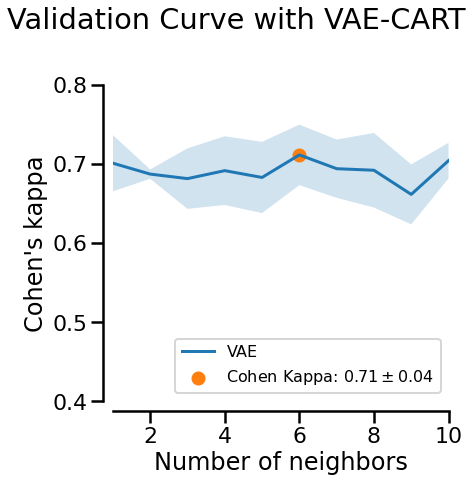

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7, 7))
ax.plot(param_range, test_scores_mean, label="VAE")
ax.fill_between(
    param_range,
    test_scores_mean + test_scores_std,
    test_scores_mean - test_scores_std,
    alpha=0.2,
)
idx_max = test_scores_mean.argmax()
ax.scatter(
    param_range[idx_max],
    test_scores_mean[idx_max],
    label=r"Cohen Kappa: ${:.2f}\pm{:.2f}$".format(
        test_scores_mean[idx_max], test_scores_std[idx_max]
    ),
)

fig.suptitle("Validation Curve with VAE-CART")
ax.set_xlabel("Number of neighbors")
ax.set_ylabel("Cohen's kappa")

# make nice plotting
sns.despine(ax=ax, offset=10)
ax.set_xlim([1, 10])
ax.set_ylim([0.4, 0.8])
ax.legend(loc="lower right", fontsize=16)
plt.tight_layout()
plt.show()